## Homework 2. Предсказание цены дома📝

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# some lib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


In [2]:
data = pd.read_csv('train_house.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [3]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.



In [7]:
nulls = data.isna().sum()
nulls = nulls[nulls > 0]
nulls

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Можно удалить PoolQC, MiscFeature и Alley, так как там почти все null.
Можно удалить столбец id
Из всего про подвал оставим только общую площадь, BsmtCond, BsmtQual

In [9]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'BsmtExposure',
                   'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Id'], axis=1)

In [10]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [12]:
data.isnull().any().any()

True

In [15]:
nulls = data.isna().sum()
nulls = nulls[nulls > 0]
print('Количество пропусков в каждом столбце: ', nulls)
nulls_percent = nulls/len(data)
print('Доля от общего числа значений: ', nulls_percent)

Количество пропусков в каждом столбце:  LotFrontage      259
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64
Доля от общего числа значений:  LotFrontage     0.177397
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
Fence           0.807534
dtype: float64


✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

In [18]:
for col in data:
    if data[col].isnull().sum() > 0:
        print(col, ':', data[col].dtypes)

LotFrontage : float64
MasVnrType : object
MasVnrArea : float64
BsmtQual : object
BsmtCond : object
Electrical : object
FireplaceQu : object
GarageType : object
GarageYrBlt : float64
GarageFinish : object
GarageQual : object
GarageCond : object
Fence : object


In [19]:
cat_names = data.select_dtypes('object').columns

In [20]:
for column in cat_names:
    top_of_column = data[column].describe()['top']
    data[column] = data[column].fillna(top_of_column)

In [22]:
float_names = data.select_dtypes('float64').columns

In [24]:
for column in float_names:
    top_of_column = data[column].mean()
    data[column] = data[column].fillna(top_of_column)

✅ Проверьте, что вы действительно избавились от пропусков

In [25]:
data.isnull().any().any()

False

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [26]:
data_coded = data.copy()

In [27]:
label_columns = list()
ohe_columns = list()

In [28]:
for column in cat_names:
    if data_coded[column].nunique() == 2:
        label_columns.append(column)
    else:
        ohe_columns.append(column) 

In [29]:
for column in label_columns:
    data_coded[column] = LabelEncoder().fit_transform(data_coded[column])

In [30]:
data_coded = pd.get_dummies(data=data_coded, columns=ohe_columns, drop_first=True, dtype=int)

In [31]:
data_coded.head(5)

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,0,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,0,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками.

In [40]:
data_corr = data.drop(labels=cat_names, axis=1)
data_corr.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


<Axes: >

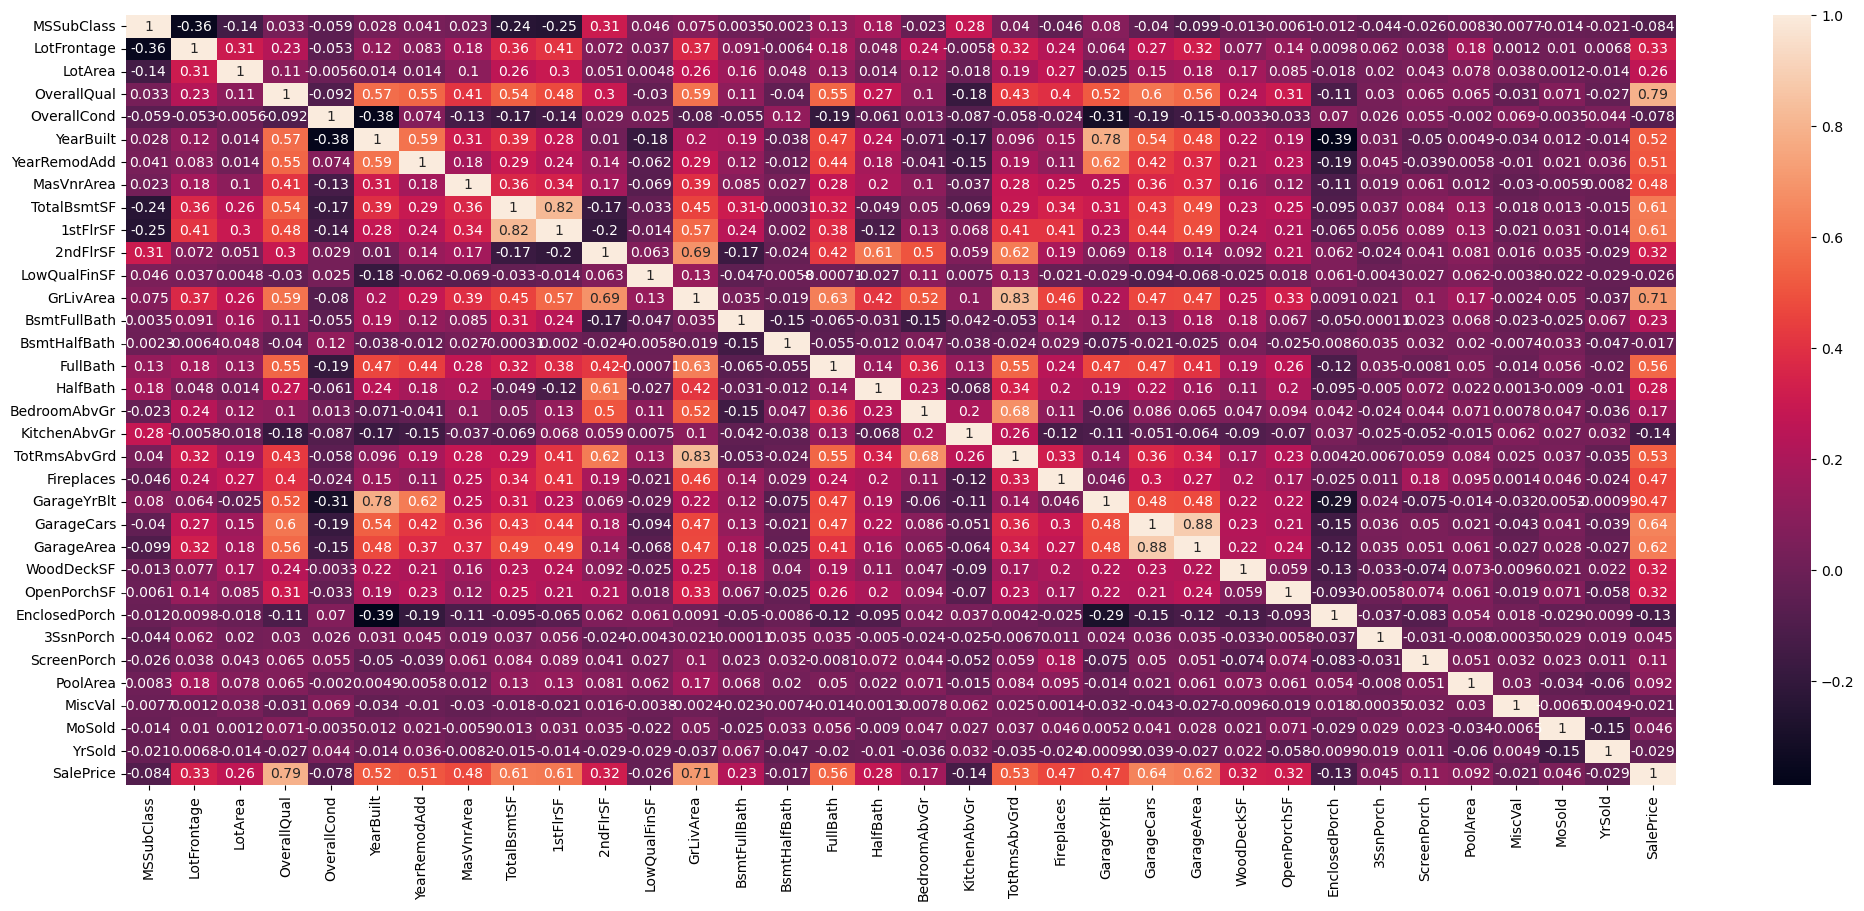

In [41]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(data_corr.corr(), linewidths=0.001, annot=True)

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную

In [50]:
X = data_coded.drop('SalePrice', axis=1)
y = data['SalePrice']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, np.log1p(y), test_size=0.75, random_state=13)

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

**Linear Regression**

In [52]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression()

In [53]:
import math

In [54]:
print("MSE train: ", mean_squared_error(math.e**(y_train)-1, math.e**(lin_regr.predict(X_train))-1))
print("MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(lin_regr.predict(X_test))-1))

MSE train:  113955314.88738273
MSE test:  4845826428.334408


In [55]:
print("MAE train: ", mean_absolute_error(math.e**(y_train)-1, math.e**(lin_regr.predict(X_train))-1))
print("MAE test: ", mean_absolute_error(math.e**(y_test)-1, math.e**(lin_regr.predict(X_test))-1))

MAE train:  7487.660485502437
MAE test:  21875.28471571935


In [56]:
print("r2_score train: ", r2_score(math.e**(y_train)-1, math.e**(lin_regr.predict(X_train))-1))
print("r2_score test: ", r2_score(math.e**(y_test)-1, math.e**(lin_regr.predict(X_test))-1))

r2_score train:  0.9813705212850861
r2_score test:  0.23923075210604927


In [57]:
coef_lin_reg = pd.DataFrame(lin_regr.coef_, index = X.columns, columns = ['coef'])
coef_lin_reg.sort_values(by=['coef'])

,coef
ExterQual_Fa,-0.418309
Condition1_RRAe,-0.352874
LandSlope_Sev,-0.314559
Neighborhood_MeadowV,-0.279433
RoofStyle_Mansard,-0.245431
...,...
MSZoning_RH,0.434939
MSZoning_RL,0.442820
MSZoning_FV,0.487394
Condition2_Norm,0.494682


**Lasso**

In [58]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

print("lasso MSE train: ", mean_squared_error(math.e**(y_train)-1, math.e**(lasso.predict(X_train))-1))
print("lasso MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(lasso.predict(X_test))-1))

print("lasso MAE train: ", mean_absolute_error(math.e**(y_train)-1, math.e**(lasso.predict(X_train))-1))
print("lasso MAE test: ", mean_absolute_error(math.e**(y_test)-1, math.e**(lasso.predict(X_test))-1))

print("lasso r2_score train: ", r2_score(math.e**(y_train)-1, math.e**(lasso.predict(X_train))-1))
print("lasso r2_score test: ", r2_score(math.e**(y_test)-1, math.e**(lasso.predict(X_test))-1))

coef_lasso = pd.DataFrame(lasso.coef_, index=X.columns, columns=['coef_lasso']).sort_values(by=["coef_lasso"])

coef_lasso

lasso MSE train:  305073245.04590034
lasso MSE test:  10377344426.138807
lasso MAE train:  12362.52427400949
lasso MAE test:  19772.827684461823
lasso r2_score train:  0.9501264549995853
lasso r2_score test:  -0.6291884637154999


,coef_lasso
BsmtQual_Fa,-0.051908
HeatingQC_Fa,-0.036993
Neighborhood_Mitchel,-0.036733
KitchenQual_Gd,-0.027781
BsmtQual_Gd,-0.026543
...,...
BsmtFullBath,0.061850
MSZoning_FV,0.063015
OverallQual,0.063137
Foundation_PConc,0.067945


**Ridge**

In [59]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

print("ridge MSE train: ", mean_squared_error(math.e**(y_train)-1, math.e**(ridge.predict(X_train))-1))
print("ridge MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(ridge.predict(X_test))-1))

print("ridge MAE train: ", mean_absolute_error(math.e**(y_train)-1, math.e**(ridge.predict(X_train))-1))
print("ridge MAE test: ", mean_absolute_error(math.e**(y_test)-1, math.e**(ridge.predict(X_test))-1))

print("ridge r2_score train: ", r2_score(math.e**(y_train)-1, math.e**(ridge.predict(X_train))-1))
print("ridge r2_score test: ", r2_score(math.e**(y_test)-1, math.e**(ridge.predict(X_test))-1))

coef_ridge = pd.DataFrame(ridge.coef_, index=X.columns, columns=['coef_ridge']).sort_values(by=['coef_ridge'])

coef_ridge

ridge MSE train:  116961288.6140384
ridge MSE test:  5084608897.654204
ridge MAE train:  7754.374073481539
ridge MAE test:  20617.75449830218
ridge r2_score train:  0.9808791030163229
ridge r2_score test:  0.20174316102509493


,coef_ridge
ExterQual_Fa,-0.329107
Condition1_RRAe,-0.276544
RoofStyle_Mansard,-0.222879
Neighborhood_MeadowV,-0.208309
LotConfig_FR3,-0.194296
...,...
MSZoning_RM,0.297403
MSZoning_RH,0.300700
MSZoning_RL,0.319644
SaleType_Oth,0.321576
